In [ ]:
import sys
from pathlib import Path

repo_path = Path("..") / ".."/"RatInABox"  # relative path of RatInABox repo from the notebook
sys.path.insert(0, str(repo_path.resolve()))

import ratinabox

from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *
from tqdm.notebook import tqdm  # gives time bar

import pandas as pd
#stylize plots and set figure directory for saving 
ratinabox.stylize_plots(); ratinabox.autosave_plots=True; ratinabox.figure_directory="../figures/"

In [3]:
# 1 Initialise environment.
Env = Environment(params={"dimensionality": "1D", "scale": 1})

# 3 Add Agent.
Ag = Agent(Env)
Ag.pos = np.array([0.5])
Ag.speed_mean = 0.2

# 4 Add place cells.
PCs = PlaceCells(
    Ag,
    params={
        "n": 100,
        "description": "gaussian_threshold",
        "widths": 0.40,
        "max_fr": 10,
        "min_fr": 0.1,
        "color": "C1",
    },
)
#PCs.place_cell_centres[-1] = np.array([1.1])

# 6 Simulate.
dt = 50e-3
T = 5 * 60 #5 mins  

for i in tqdm(range(int(T / dt))):
    Ag.update(dt=dt)
    PCs.update()


  0%|          | 0/6000 [00:00<?, ?it/s]

In [11]:
# Export data into a dataframe 
print(Ag.history)
print(len(Ag.history))

{'t': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002, 1.0500000000000003, 1.1000000000000003, 1.1500000000000004, 1.2000000000000004, 1.2500000000000004, 1.3000000000000005, 1.3500000000000005, 1.4000000000000006, 1.4500000000000006, 1.5000000000000007, 1.5500000000000007, 1.6000000000000008, 1.6500000000000008, 1.7000000000000008, 1.7500000000000009, 1.800000000000001, 1.850000000000001, 1.900000000000001, 1.950000000000001, 2.000000000000001, 2.0500000000000007, 2.1000000000000005, 2.1500000000000004, 2.2, 2.25, 2.3, 2.3499999999999996, 2.3999999999999995, 2.4499999999999993, 2.499999999999999, 2.549999999999999, 2.5999999999999988, 2.6499999999999986, 2.6999999999999984, 2.7499999999999982, 2.799999999999998, 2.849999999999998, 2.8999999999999977

Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_22/trajectory_2001.png  & .svg


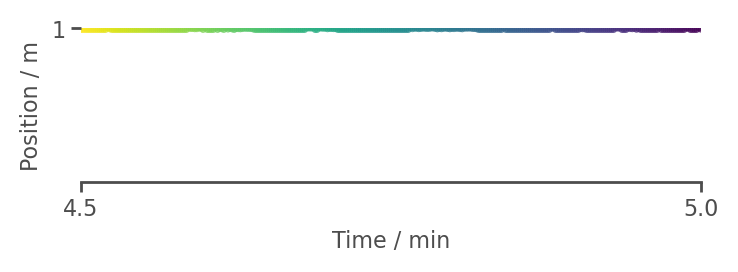

In [7]:

# 7 Plot trajectory.
fig, ax = Ag.plot_position_heatmap()
fig, ax = Ag.plot_trajectory(t_start=Ag.t-30, fig=fig, ax=ax,color="changing")

Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_22/place_cell_locations_2001.png  & .svg
Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_22/PlaceCells_ratemaps_2001.png  & .svg
Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_22/PlaceCells_ratemaps_2001_1.png  & .svg
Figure saved to /Users/saramolasmedina/Documents/MINI/figures/25_08_22/PlaceCells_ratemaps_2001_2.png  & .svg


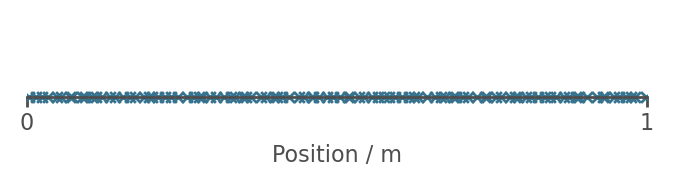

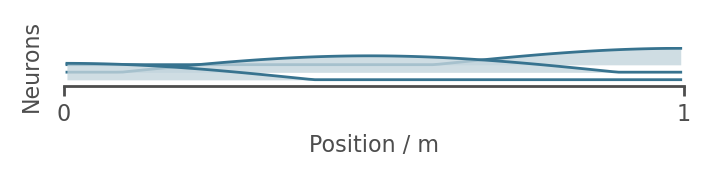

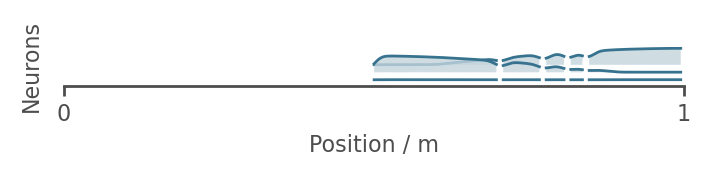

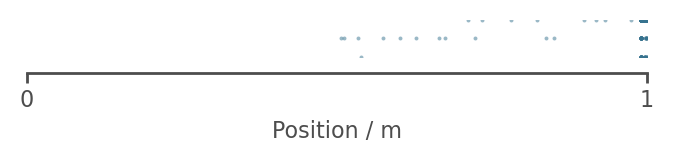

In [9]:
# 9 Plot place cell locations.
fig, ax = PCs.plot_place_cell_locations()

# 10 Plot rate maps (first analytically, second using bin exploration data, third using observed spikes ) .
fig, ax = PCs.plot_rate_map(chosen_neurons="3", method="groundtruth")
fig, ax = PCs.plot_rate_map(chosen_neurons="3", method="history")
fig, ax = PCs.plot_rate_map(chosen_neurons="3", method="neither", spikes=True)